In [1]:
%matplotlib inline

# Lecture 4: Tables, pt. II

In [2]:
import babypandas as bpd

# NBA Salaries

- The file `nba_salaries.csv` contains all salaries from 2015-2016 NBA season.

In [3]:
salaries = bpd.read_csv('nba_salaries.csv').set_index('PLAYER')
salaries

,POSITION,TEAM,2015_SALARY
PLAYER,,,
Paul Millsap,PF,Atlanta Hawks,18.671659
Al Horford,C,Atlanta Hawks,12.000000
Tiago Splitter,C,Atlanta Hawks,9.756250
Jeff Teague,PG,Atlanta Hawks,8.000000
Kyle Korver,SG,Atlanta Hawks,5.746479
...,...,...,...
Gary Neal,PG,Washington Wizards,2.139000
DeJuan Blair,C,Washington Wizards,2.000000
Kelly Oubre Jr.,SF,Washington Wizards,1.920240


## Questions we can answer:

- What was the biggest salary?
- How many players were there?
- What was LeBron James' salary?

## Questions we'll learn how to answer today:

- *Who* had the biggest salary?
- Who was the highest paid center?
- What is the total payroll of the Cleveland Cavaliers?
- What team had the largest combined salary?

## Recall: getting a column

- use `.get(column_label)`
- Columns are not DataFrames, they're Series

In [4]:
salaries.get('2015_SALARY')

PLAYER
Paul Millsap       18.671659
Al Horford         12.000000
Tiago Splitter      9.756250
Jeff Teague         8.000000
Kyle Korver         5.746479
                     ...    
Gary Neal           2.139000
DeJuan Blair        2.000000
Kelly Oubre Jr.     1.920240
Garrett Temple      1.100602
Jarell Eddie        0.561716
Name: 2015_SALARY, Length: 417, dtype: float64

## Recall: getting a particular value from a column

- Use `.get(column_label).loc[row_label]`
- How much did LeBron James make?

In [5]:
salaries.get('2015_SALARY').loc['LeBron James']

22.9705

## How to get a particular element from a table:

1. `.get()` the column label
2. `.loc[]` the row label

In this class, we'll always get column, then row (but row, then column is also possible).

 Example: What position does LeBron play?

In [6]:
#- use .get() then .loc[]
salaries.get('POSITION').loc['LeBron James']

'SF'

## Recall: Salary Analysis

- What was the biggest/smallest salary? What was the average salary?
- *Series* have helpful methods, like `.min()`, `.max()`, `.mean()`, etc.

In [7]:
salaries.get('2015_SALARY').min()

0.030888

In [8]:
salaries.get('2015_SALARY').max()

25.0

In [9]:
salaries.get('2015_SALARY').mean()

5.074814482014388

## Use Case: *Who* had the biggest salary?

- Strategy: Sort the table by salary and take the name at the top

### Step 1) Sort the table

- Use the `.sort_values(by=column_name)` method to sort.
- **Notice:** Creates a new table.
- Everything works as expected, but we wanted *descending* order.

In [10]:
salaries.sort_values(by='2015_SALARY')

,POSITION,TEAM,2015_SALARY
PLAYER,,,
Thanasis Antetokounmpo,SF,New York Knicks,0.030888
Cory Jefferson,PF,Phoenix Suns,0.049709
Jordan McRae,SG,Phoenix Suns,0.049709
Orlando Johnson,SG,Phoenix Suns,0.055722
Phil Pressey,PG,Phoenix Suns,0.055722
...,...,...,...
Dwight Howard,C,Houston Rockets,22.359364
Carmelo Anthony,SF,New York Knicks,22.875000
LeBron James,SF,Cleveland Cavaliers,22.970500


### Step 1) Sorting the table in *descending* order

- Use `.sort_values(by=column_name, ascending=False)` to sort in *descending* order

In [11]:
highest_salaries = salaries.sort_values(by='2015_SALARY', ascending=False)
highest_salaries

,POSITION,TEAM,2015_SALARY
PLAYER,,,
Kobe Bryant,SF,Los Angeles Lakers,25.000000
Joe Johnson,SF,Brooklyn Nets,24.894863
LeBron James,SF,Cleveland Cavaliers,22.970500
Carmelo Anthony,SF,New York Knicks,22.875000
Dwight Howard,C,Houston Rockets,22.359364
...,...,...,...
Elliot Williams,SG,Memphis Grizzlies,0.055722
Orlando Johnson,SG,Phoenix Suns,0.055722
Cory Jefferson,PF,Phoenix Suns,0.049709


### Step 2) Get the *name* of the person with the highest salary

- We saw that is was Kobe, but how do we get the name using code?
- Remember, the index is an array

In [12]:
highest_salaries.index[0]

'Kobe Bryant'

## Discussion Question

Suppose we didn't know how to sort in descending order. Which of these would still work?

- a) `salaries.sort_values(by='2015_SALARY')[max()]`
- b) `salaries.sort_values(by='2015_SALARY').index[0]`
- c) `salaries.sort_values(by='2015_SALARY').loc[max]`
- a) `salaries.sort_values(by='2015_SALARY').index[-1]`

## Answer: (d)

In [13]:
salaries.sort_values(by='2015_SALARY').index[-1]

'Kobe Bryant'

## Use Case: What team did the person with the third-lowest salary play for?

- We have the tools, but its a little tricky. Can you think of a strategy?

## Strategy #1

1. Sort the table in ascending order using `.sort_values(by='ADJUSTED_SALARY')`
2. Get the name of the person using `.index[2]` (remember starts at 0)
3. Use `.get('TEAM').loc[their_name]` to get their team name.



In [14]:
lowest_salaries = salaries.sort_values(by='2015_SALARY')
lowest_salaries

,POSITION,TEAM,2015_SALARY
PLAYER,,,
Thanasis Antetokounmpo,SF,New York Knicks,0.030888
Cory Jefferson,PF,Phoenix Suns,0.049709
Jordan McRae,SG,Phoenix Suns,0.049709
Orlando Johnson,SG,Phoenix Suns,0.055722
Phil Pressey,PG,Phoenix Suns,0.055722
...,...,...,...
Dwight Howard,C,Houston Rockets,22.359364
Carmelo Anthony,SF,New York Knicks,22.875000
LeBron James,SF,Cleveland Cavaliers,22.970500


In [15]:
name = lowest_salaries.index[2]
name

'Jordan McRae'

In [16]:
lowest_salaries.get('TEAM').loc[name]

'Phoenix Suns'

## Another Approach

- Can we just get the 3rd element without knowing the label?
- Yes, with `.iloc[]`.
- `.iloc[]` takes integer position instead of row label.

In [17]:
lowest_salaries.get('TEAM')

PLAYER
Thanasis Antetokounmpo        New York Knicks
Cory Jefferson                   Phoenix Suns
Jordan McRae                     Phoenix Suns
Orlando Johnson                  Phoenix Suns
Phil Pressey                     Phoenix Suns
                                 ...         
Dwight Howard                 Houston Rockets
Carmelo Anthony               New York Knicks
LeBron James              Cleveland Cavaliers
Joe Johnson                     Brooklyn Nets
Kobe Bryant                Los Angeles Lakers
Name: TEAM, Length: 417, dtype: object

In [18]:
lowest_salaries.get('TEAM').iloc[2]

'Phoenix Suns'

## Strategy #2

1. Sort the table in ascending order using `.sort_values(by='ADJUSTED_SALARY')`, as before.
2. Use `.get('TEAM').iloc[2]` to get their team name.

In [19]:
salaries.sort_values(by='2015_SALARY').get('TEAM').iloc[2]

'Phoenix Suns'

## Summary of accessing a Series

- There are two ways to get an element of a series:
    - `.loc[]` uses the row label
    - `.iloc[]` uses the integer position
- Usually `.loc` is more convenient

In [20]:
teams = lowest_salaries.get('TEAM')
teams

PLAYER
Thanasis Antetokounmpo        New York Knicks
Cory Jefferson                   Phoenix Suns
Jordan McRae                     Phoenix Suns
Orlando Johnson                  Phoenix Suns
Phil Pressey                     Phoenix Suns
                                 ...         
Dwight Howard                 Houston Rockets
Carmelo Anthony               New York Knicks
LeBron James              Cleveland Cavaliers
Joe Johnson                     Brooklyn Nets
Kobe Bryant                Los Angeles Lakers
Name: TEAM, Length: 417, dtype: object

In [21]:
teams.loc['Thanasis Antetokounmpo']

'New York Knicks'

In [22]:
teams.iloc[0]

'New York Knicks'

## Note

- Sometimes the integer position and row label are the same
- This happens by default with `bpd.read_csv`:

In [23]:
bpd.read_csv('nba_salaries.csv')

,PLAYER,POSITION,TEAM,2015_SALARY
0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,Al Horford,C,Atlanta Hawks,12.000000
2,Tiago Splitter,C,Atlanta Hawks,9.756250
3,Jeff Teague,PG,Atlanta Hawks,8.000000
4,Kyle Korver,SG,Atlanta Hawks,5.746479
...,...,...,...,...
412,Gary Neal,PG,Washington Wizards,2.139000
413,DeJuan Blair,C,Washington Wizards,2.000000
414,Kelly Oubre Jr.,SF,Washington Wizards,1.920240
415,Garrett Temple,SG,Washington Wizards,1.100602


In [24]:
bpd.read_csv('nba_salaries.csv').get('PLAYER').loc[3]

'Jeff Teague'

In [25]:
bpd.read_csv('nba_salaries.csv').get('PLAYER').iloc[3]

'Jeff Teague'

# Selecting Rows

## Use Case: Who was the highest paid center (C)?

In [26]:
salaries

,POSITION,TEAM,2015_SALARY
PLAYER,,,
Paul Millsap,PF,Atlanta Hawks,18.671659
Al Horford,C,Atlanta Hawks,12.000000
Tiago Splitter,C,Atlanta Hawks,9.756250
Jeff Teague,PG,Atlanta Hawks,8.000000
Kyle Korver,SG,Atlanta Hawks,5.746479
...,...,...,...
Gary Neal,PG,Washington Wizards,2.139000
DeJuan Blair,C,Washington Wizards,2.000000
Kelly Oubre Jr.,SF,Washington Wizards,1.920240


## Selecting Rows

- We could do it if we had a table consisting only of centers.
- But how do we get that table?

## The Solution

In [27]:
salaries[salaries.get('POSITION') == 'C']

,POSITION,TEAM,2015_SALARY
PLAYER,,,
Al Horford,C,Atlanta Hawks,12.000000
Tiago Splitter,C,Atlanta Hawks,9.756250
Walter Tavares,C,Atlanta Hawks,1.000000
Tyler Zeller,C,Boston Celtics,2.616975
Jared Sullinger,C,Boston Celtics,2.569260
...,...,...,...
Rudy Gobert,C,Utah Jazz,1.175880
Jeff Withey,C,Utah Jazz,0.947276
Nene Hilario,C,Washington Wizards,13.000000


In [28]:
'PG' == 'C'

False

In [29]:
'C' == 'C'

True

In [30]:
salaries.get('POSITION') == 'C'

PLAYER
Paul Millsap       False
Al Horford          True
Tiago Splitter      True
Jeff Teague        False
Kyle Korver        False
                   ...  
Gary Neal          False
DeJuan Blair        True
Kelly Oubre Jr.    False
Garrett Temple     False
Jarell Eddie       False
Name: POSITION, Length: 417, dtype: bool

## Boolean Indexing

To select only some rows of `salaries`:

1. Make a list/array/Series of `True`s (keep) and `Falses` (toss)
2. Then pass it into `salaries[]`.

Rather than making the list by hand, we usually make comparisons.

## Elementwise comparisons work as expected

In [31]:
salaries.get('2015_SALARY') > 5

PLAYER
Paul Millsap        True
Al Horford          True
Tiago Splitter      True
Jeff Teague         True
Kyle Korver         True
                   ...  
Gary Neal          False
DeJuan Blair       False
Kelly Oubre Jr.    False
Garrett Temple     False
Jarell Eddie       False
Name: 2015_SALARY, Length: 417, dtype: bool

In [32]:
#- make a table with only players who made more than 5 million
salaries[salaries.get('2015_SALARY') > 5]

,POSITION,TEAM,2015_SALARY
PLAYER,,,
Paul Millsap,PF,Atlanta Hawks,18.671659
Al Horford,C,Atlanta Hawks,12.000000
Tiago Splitter,C,Atlanta Hawks,9.756250
Jeff Teague,PG,Atlanta Hawks,8.000000
Kyle Korver,SG,Atlanta Hawks,5.746479
...,...,...,...
Nene Hilario,C,Washington Wizards,13.000000
Marcin Gortat,C,Washington Wizards,11.217391
Markieff Morris,PF,Washington Wizards,8.000000


## Another example

In [33]:
#- get only the Cleveland Cavaliers
salaries[salaries.get('TEAM') == 'Cleveland Cavaliers']

,POSITION,TEAM,2015_SALARY
PLAYER,,,
LeBron James,SF,Cleveland Cavaliers,22.970500
Kevin Love,PF,Cleveland Cavaliers,19.689000
Kyrie Irving,PG,Cleveland Cavaliers,16.407501
Tristan Thompson,C,Cleveland Cavaliers,14.260870
Brendan Haywood,C,Cleveland Cavaliers,10.522500
Iman Shumpert,SG,Cleveland Cavaliers,8.988765
Timofey Mozgov,C,Cleveland Cavaliers,4.950000
Mo Williams,PG,Cleveland Cavaliers,2.100000
Sasha Kaun,C,Cleveland Cavaliers,1.276000


## When the conditions are not satisfied

In [34]:
salaries[salaries.get('TEAM') == 'San Diego Surfers']

,POSITION,TEAM,2015_SALARY
PLAYER,,,


## Use Case: Who was the highest paid center?

1. Extract a table of centers
2. Sort by salary
3. Return first thing in index

In [35]:
#- extract a table of centers
centers = salaries[salaries.get('POSITION') == 'C']
centers

,POSITION,TEAM,2015_SALARY
PLAYER,,,
Al Horford,C,Atlanta Hawks,12.000000
Tiago Splitter,C,Atlanta Hawks,9.756250
Walter Tavares,C,Atlanta Hawks,1.000000
Tyler Zeller,C,Boston Celtics,2.616975
Jared Sullinger,C,Boston Celtics,2.569260
...,...,...,...
Rudy Gobert,C,Utah Jazz,1.175880
Jeff Withey,C,Utah Jazz,0.947276
Nene Hilario,C,Washington Wizards,13.000000


In [36]:
#- sort and return first thing in index
centers.sort_values(by='2015_SALARY', ascending=False).index[0]

'Dwight Howard'

## Discussion Question

What was the total payroll of the Cleveland Cavaliers?

- a) `salaries[salaries.get('TEAM') == 'Cleveland Cavaliers'].get('2015_SALARY').sum()`
- b) `salaries.get('2015_SALARY').sum()[salaries.get('TEAM') == 'Cleveland Cavaliers']`
- c) `salaries['Cleveland Cavaliers'].get('2015_SALARY').sum()`

## Answer: a)

In [37]:
cavs = salaries[salaries.get('TEAM') == 'Cleveland Cavaliers']
cavs

,POSITION,TEAM,2015_SALARY
PLAYER,,,
LeBron James,SF,Cleveland Cavaliers,22.970500
Kevin Love,PF,Cleveland Cavaliers,19.689000
Kyrie Irving,PG,Cleveland Cavaliers,16.407501
Tristan Thompson,C,Cleveland Cavaliers,14.260870
Brendan Haywood,C,Cleveland Cavaliers,10.522500
Iman Shumpert,SG,Cleveland Cavaliers,8.988765
Timofey Mozgov,C,Cleveland Cavaliers,4.950000
Mo Williams,PG,Cleveland Cavaliers,2.100000
Sasha Kaun,C,Cleveland Cavaliers,1.276000


In [38]:
#- use series method .sum()
cavs.get('2015_SALARY').sum()

102.31241200000001

# GroupBy

## Use Case: What team had the highest payroll?

- We can find the payroll for one team.
- But how can we find the payroll for *all* teams at once?
- Can we somehow group the rows of the table by team name?

In [39]:
salaries

,POSITION,TEAM,2015_SALARY
PLAYER,,,
Paul Millsap,PF,Atlanta Hawks,18.671659
Al Horford,C,Atlanta Hawks,12.000000
Tiago Splitter,C,Atlanta Hawks,9.756250
Jeff Teague,PG,Atlanta Hawks,8.000000
Kyle Korver,SG,Atlanta Hawks,5.746479
...,...,...,...
Gary Neal,PG,Washington Wizards,2.139000
DeJuan Blair,C,Washington Wizards,2.000000
Kelly Oubre Jr.,SF,Washington Wizards,1.920240


## `.groupby`


In [40]:
salaries.groupby('TEAM').sum()

,2015_SALARY
TEAM,
Atlanta Hawks,69.573103
Boston Celtics,50.285499
Brooklyn Nets,57.306976
Charlotte Hornets,84.102397
Chicago Bulls,78.820890
...,...
Sacramento Kings,68.384890
San Antonio Spurs,84.652074
Toronto Raptors,74.672620


## `.groupby`

1. Use `.groupby(column_name)` to gather rows which have the same value in the column
2. Apply an *aggregation* function *within* each group

The aggregation is applied to each column.

Some aggregation functions: `.count()`, `.sum()`, `.mean()`, `.median()`, `.max()`, `.min()`

In [41]:
salaries

,POSITION,TEAM,2015_SALARY
PLAYER,,,
Paul Millsap,PF,Atlanta Hawks,18.671659
Al Horford,C,Atlanta Hawks,12.000000
Tiago Splitter,C,Atlanta Hawks,9.756250
Jeff Teague,PG,Atlanta Hawks,8.000000
Kyle Korver,SG,Atlanta Hawks,5.746479
...,...,...,...
Gary Neal,PG,Washington Wizards,2.139000
DeJuan Blair,C,Washington Wizards,2.000000
Kelly Oubre Jr.,SF,Washington Wizards,1.920240


## Interesting thing # 1

- The index has changed to team names.
- In general, the new row labels are the *group labels* (the thing that is used to determine if two rows were in same group).

In [42]:
salaries.groupby('TEAM').sum()

,2015_SALARY
TEAM,
Atlanta Hawks,69.573103
Boston Celtics,50.285499
Brooklyn Nets,57.306976
Charlotte Hornets,84.102397
Chicago Bulls,78.820890
...,...
Sacramento Kings,68.384890
San Antonio Spurs,84.652074
Toronto Raptors,74.672620


## Interesting thing #2

- The `POSITION` and `TEAM` columns have disappeared. Why?

In [43]:
salaries.groupby('TEAM').sum()

,2015_SALARY
TEAM,
Atlanta Hawks,69.573103
Boston Celtics,50.285499
Brooklyn Nets,57.306976
Charlotte Hornets,84.102397
Chicago Bulls,78.820890
...,...
Sacramento Kings,68.384890
San Antonio Spurs,84.652074
Toronto Raptors,74.672620


## Disappearing columns

- The aggregation function is applied to each column.
- If it doesn't make sense to apply it to a particular column, that column will disappear.
- Example: can't sum strings, like in `POSITION` column.
- Surprising example: *can* `max()` strings (alphabetically last)

In [44]:
salaries.groupby('TEAM').max()

,POSITION,2015_SALARY
TEAM,,
Atlanta Hawks,SG,18.671659
Boston Celtics,SG,7.730337
Brooklyn Nets,SG,24.894863
Charlotte Hornets,SG,13.500000
Chicago Bulls,SG,20.093064
...,...,...
Sacramento Kings,SG,15.851950
San Antonio Spurs,SG,19.689000
Toronto Raptors,SG,13.600000


## Use Case: What team has the highest payroll?

1. Group by team.
2. Within each group, compute total salary.
3. Sort by salary, descending order.
4. Take the name of the first team.

In [45]:
#- group, sum, sort, index
salaries.groupby('TEAM').sum().sort_values('2015_SALARY', ascending=False).index[0]

'Cleveland Cavaliers'

## Use Case: How many players play each position?

In [46]:
#- group, count
each_position = salaries.groupby('POSITION').count()
each_position

,TEAM,2015_SALARY
POSITION,,
C,69,69
PF,85,85
PG,85,85
SF,82,82
SG,96,96


## Better column names?

To rename a column

1. Add a new column with `.assign`
2. Drop the old column(s) with `.drop(by=list_of_column_labels)`

In [47]:
counts = each_position.assign(COUNT=each_position.get('TEAM'))
counts

,TEAM,2015_SALARY,COUNT
POSITION,,,
C,69,69,69
PF,85,85,85
PG,85,85,85
SF,82,82,82
SG,96,96,96


In [48]:
counts.drop(columns=['TEAM', '2015_SALARY'])

,COUNT
POSITION,
C,69
PF,85
PG,85
SF,82
SG,96


# IMDB

In [49]:
imdb = bpd.read_csv('imdb.csv').set_index('Title')
imdb

,Votes,Rating,Year,Decade
Title,,,,
M,88355,8.4,1931,1930
Singin' in the Rain,132823,8.3,1952,1950
All About Eve,74178,8.3,1950,1950
Léon,635139,8.6,1994,1990
The Elephant Man,145514,8.2,1980,1980
...,...,...,...,...
Forrest Gump,1078416,8.7,1994,1990
Le salaire de la peur,31003,8.1,1953,1950
3 Idiots,167076,8.2,2009,2000


## What was the highest rated movie of the 1990's?

In [50]:
#- group or select?
imdb[imdb.get('Decade') == 1990].sort_values('Rating').index[-1]

'The Shawshank Redemption'

## How many movies appear from each decade?

In [51]:
imdb.groupby('Decade').count()

,Votes,Rating,Year
Decade,,,
1920,4,4,4
1930,7,7,7
1940,14,14,14
1950,30,30,30
1960,22,22,22
1970,21,21,21
1980,31,31,31
1990,42,42,42
2000,50,50,50


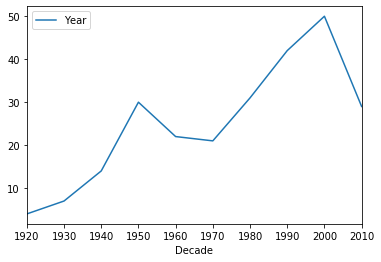

In [52]:
imdb.groupby('Decade').count().plot(y='Year')